In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math

In [23]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
X = dataset.iloc[:, :].values
 

In [24]:
N = 10_000
d= 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for round in range(0, N):
    ad = 0
    max_ucb = 0
    for i in range(0, d):
        if numbers_of_selections[i] > 0:
            average_reward = sums_of_rewards[i]/ numbers_of_selections[i]
            confidence_interval = math.sqrt(3/2 * math.log(round + 1)/ numbers_of_selections[i])
            upper_bound = average_reward + confidence_interval
        else:
            upper_bound = 1e400
        if upper_bound > max_ucb:
            max_ucb = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[round, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward


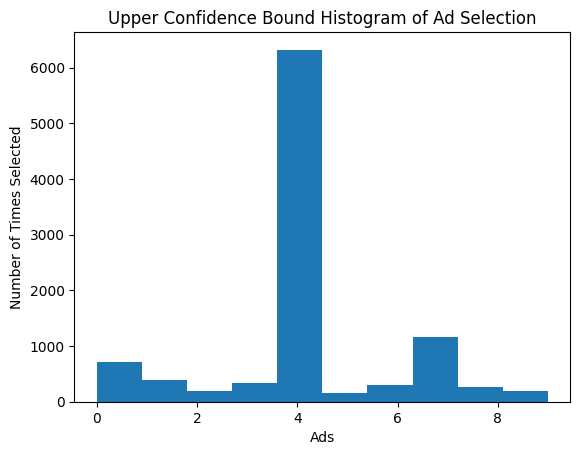

In [25]:
plt.hist(ads_selected)
plt.title('Upper Confidence Bound Histogram of Ad Selection')
plt.xlabel('Ads')
plt.ylabel("Number of Times Selected")
plt.show()